## Part 1: Loading data, summary statistics, and plotting/correlations

In [1]:
!python --version

Python 3.10.12


In [2]:
# 1.
from datetime import datetime as dt, timezone
import pandas as pd
from numpy import argmax
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.tsa.stattools import grangercausalitytests
import json


charging_station_data = pd.read_csv('data/charging_station_data.tsv', sep='\t', encoding='ISO-8859-1')

charging_cols = [
	# unique identifiers
	'id',
	'station_name',

	# associate using date
	'open_date',

	# associate using location
	'country',
	'state',
	# 'city',

	# filter using status
	'status_code',
]
print(charging_station_data.head(10))

policy_data = pd.read_csv('data/transportation_policy_data.tsv', sep='\t', encoding='ISO-8859-1')
print(policy_data.head(10))

policy_cols = [
	# unique identifiers
	'id',
	'title',

	# associate using date
	'significant_update_date',

	# associate using location
	'state',

	# categorization
	'type',
	'categories'
]

parsed_date_col = 'parsed_date'

                        station_name   open_date    id date_last_confirmed  \
0           LADWP - Truesdale Center  1999-10-15  1517          2023-09-14   
1    LADWP - West LA District Office  2020-02-28  1519          2023-01-10   
2      Los Angeles Convention Center  1995-08-30  1523          2023-01-10   
3      LADWP - John Ferraro Building  1999-10-15  1525          2023-09-14   
4         LADWP - Haynes Power Plant  2018-05-01  1531          2023-01-10   
5  LADWP - Harbor Generating Station  1999-10-15  1552          2023-01-10   
6                LADWP - Sylmar West  2016-01-01  1556          2023-01-10   
7          LADWP - EV Service Center  1999-10-15  1572          2023-01-10   
8             LADWP - Fairfax Center  2019-04-01  1573          2023-01-10   
9     California Air Resources Board  1996-10-15  1583          2022-09-14   

  expected_date status_code            updated_at   facility_type  \
0          None           E  2023-09-14T14:01:49Z         UTILITY   
1  

In [3]:
charging_station_data['open_date'].value_counts()['US']

12

In [4]:
charging_station_data.head(10)

,station_name,open_date,id,date_last_confirmed,expected_date,status_code,updated_at,facility_type,city,state,zip,street_address,country,ev_network
0,LADWP - Truesdale Center,1999-10-15,1517,2023-09-14,None,E,2023-09-14T14:01:49Z,UTILITY,Sun Valley,CA,91352,11797 Truesdale St,US,SHELL_RECHARGE
1,LADWP - West LA District Office,2020-02-28,1519,2023-01-10,None,E,2023-02-15T22:45:41Z,UTILITY,Los Angeles,CA,90024,1394 S Sepulveda Blvd,US,Non-Networked
2,Los Angeles Convention Center,1995-08-30,1523,2023-01-10,None,E,2023-02-14T15:54:11Z,PARKING_GARAGE,Los Angeles,CA,90015,1201 S Figueroa St,US,Non-Networked
3,LADWP - John Ferraro Building,1999-10-15,1525,2023-09-14,None,E,2023-09-14T14:01:49Z,UTILITY,Los Angeles,CA,90012,111 N Hope St,US,Non-Networked
4,LADWP - Haynes Power Plant,2018-05-01,1531,2023-01-10,None,E,2023-02-15T22:45:41Z,UTILITY,Long Beach,CA,90803,6801 E 2nd St,US,Non-Networked
5,LADWP - Harbor Generating Station,1999-10-15,1552,2023-01-10,None,E,2023-02-15T22:45:41Z,UTILITY,Wilmington,CA,90744,161 N Island Ave,US,Non-Networked
6,LADWP - Sylmar West,2016-01-01,1556,2023-01-10,None,E,2023-02-15T22:45:41Z,UTILITY,Sylmar,CA,91342,13201 Sepulveda Blvd,US,Non-Networked
7,LADWP - EV Service Center,1999-10-15,1572,2023-01-10,None,E,2023-02-15T22:45:41Z,UTILITY,Los Angeles,CA,90012,1630 N Main St,US,Non-Networked
8,LADWP - Fairfax Center,2019-04-01,1573,2023-01-10,None,E,2023-02-15T22:45:41Z,UTILITY,Los Angeles,CA,90016,2311 S Fairfax Ave,US,Non-Networked
9,California Air Resources Board,1996-10-15,1583,2022-09-14,None,E,2023-02-14T15:54:11Z,STATE_GOV,El Monte,CA,91731,9530 Telstar Ave,US,Non-Networked


In [5]:
def null_filtered(data, cols):
    mask = 1
    for col in cols:
        # mask &= data[col].notnull()
        mask &= (data[col].ne('None'))
    return data[mask].reset_index()

def filter_invalid(data, col_name):
  mask = 1
  mask &= (data[col_name].ne('US'))
  mask &= (data[col_name].ne('CA'))
  return data[mask].reset_index()

def get_formatted_date(data_slice, date_col, format: str):
    return [
        dt.strptime(date_str, format)
        for date_str in data_slice[date_col]
    ]

In [6]:
charging_station_data = null_filtered(charging_station_data, charging_cols)[charging_cols]
charging_station_data = filter_invalid(charging_station_data, 'open_date')
#charging_station_data = charging_station_data.mask(charging_station_data.astype(object).eq('None')).dropna()

In [7]:
charging_station_data.head(10)

,index,id,station_name,open_date,country,state,status_code
0,0,1517,LADWP - Truesdale Center,1999-10-15,US,CA,E
1,1,1519,LADWP - West LA District Office,2020-02-28,US,CA,E
2,2,1523,Los Angeles Convention Center,1995-08-30,US,CA,E
3,3,1525,LADWP - John Ferraro Building,1999-10-15,US,CA,E
4,4,1531,LADWP - Haynes Power Plant,2018-05-01,US,CA,E
5,5,1552,LADWP - Harbor Generating Station,1999-10-15,US,CA,E
6,6,1556,LADWP - Sylmar West,2016-01-01,US,CA,E
7,7,1572,LADWP - EV Service Center,1999-10-15,US,CA,E
8,8,1573,LADWP - Fairfax Center,2019-04-01,US,CA,E
9,9,1583,California Air Resources Board,1996-10-15,US,CA,E


In [8]:
charging_station_data[parsed_date_col] = get_formatted_date(
    charging_station_data,
    'open_date',
    '%Y-%m-%d'
)

In [9]:
# run summary statistics on charging station data
charging_station_data.info()
charging_station_data.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78396 entries, 0 to 78395
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         78396 non-null  int64         
 1   id            78396 non-null  object        
 2   station_name  78395 non-null  object        
 3   open_date     78396 non-null  object        
 4   country       78384 non-null  object        
 5   state         78396 non-null  object        
 6   status_code   78396 non-null  object        
 7   parsed_date   78396 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 4.8+ MB


,index,id,station_name,open_date,country,state,status_code,parsed_date
0,0,1517,LADWP - Truesdale Center,1999-10-15,US,CA,E,1999-10-15


In [10]:
policy_data = null_filtered(policy_data, policy_cols)[policy_cols]
policy_data = filter_invalid(policy_data, 'significant_update_date')

# policy_data = policy_data.mask(policy_data.astype(object).eq('None')).dropna()

In [11]:
policy_data[parsed_date_col] = get_formatted_date(
    policy_data,
    'significant_update_date',
    '%m/%d/%Y'
)

In [12]:
policy_data.info()
policy_data.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    1127 non-null   int64         
 1   id                       1127 non-null   int64         
 2   title                    1127 non-null   object        
 3   significant_update_date  1127 non-null   object        
 4   state                    1127 non-null   object        
 5   type                     1127 non-null   object        
 6   categories               1127 non-null   object        
 7   parsed_date              1127 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 70.6+ KB


,index,id,title,significant_update_date,state,type,categories,parsed_date
0,0,284,Congestion Mitigation and Air Quality (CMAQ) I...,11/29/2021,US,Incentives,"[{""code"": ""STATION"", ""title"": ""Alternative Fue...",2021-11-29


In [13]:
# helpers for plotting
def get_name(unformatted):
	return unformatted

def make_scatterplot(slice, x_col, y_col, title):
	sns.scatterplot(data=slice, x=x_col, y=y_col)
	plt.title(title)
	plt.xlabel(get_name(x_col))
	plt.ylabel(get_name(y_col))
	plt.show()

def make_boxplot(slice, x_col, y_col, title):
	sns.boxplot(data=slice, x=x_col, y=y_col)
	plt.title(title)
	plt.xlabel(get_name(x_col))
	plt.ylabel(get_name(y_col))
	plt.show()

def make_vertical_boxplot(slice, col, title):
	_, ax = plt.subplots(figsize=(6, 3), sharey=True, sharex=True)
	ax.spines['top'].set_visible(False)
	ax.spines['right'].set_visible(False)
	ax.spines['left'].set_visible(False)
	ax.set_title(title)
	ax.boxplot(slice[col])

def make_barplot(slice, x_col, y_col, x_label, y_label, title):
	sns.barplot(data=slice, x=x_col, y=y_col, hue=x_col, legend=False)
	plt.title(title)
	plt.xlabel(x_label)
	plt.ylabel(y_label)
	plt.xticks(rotation=45)
	plt.show()

def make_lineplot(slice, x_col, y_col, x_label, y_label, title):
	sns.lineplot(data=slice, x=x_col, y=y_col, legend=False)
	plt.title(title)
	plt.xlabel(x_label)
	plt.ylabel(y_label)
	plt.xticks(rotation=45)
	plt.show()

def filter_by_state(data_slice, state):
	return data_slice[data_slice['state'] == state].reset_index()

def filter_outliers(data_slice, col, limit):
	return data_slice[data_slice[col] < limit]

def group_by_year(data_slice, date_col):
	grouped_slice = data_slice.groupby(data_slice[date_col].dt.year).count()
	grouped_slice = grouped_slice.drop(columns=date_col)
	return grouped_slice

In [14]:
# Initial year-based correlations by state

stations_per_year_by_state = {}
policies_per_year_by_state = {}


# overall
us_stations = charging_station_data[charging_station_data['country'] == 'US']
us_stations = group_by_year(charging_station_data, parsed_date_col)
# make_barplot(
# 	us_stations,
# 	parsed_date_col,
# 	'id',
# 	'Year',
# 	'Charging Stations built',
# 	'Countrywide Stations'
# )

federal_policies = filter_by_state(policy_data, 'US')
federal_policies = group_by_year(policy_data, parsed_date_col)
# make_barplot(
# 	federal_policies,
# 	parsed_date_col,
# 	'id',
# 	'Year',
# 	'Policies Enacted',
# 	'Federal Policies'
# )

station_states = set(charging_station_data['state'])
policy_states = set(policy_data['state'])

# 50 US states plus washington DC that we have policy and station data for
state_intersections = station_states & policy_states

# Canadian provinces for which we have station data
# station_provinces = station_states - state_intersections

# by state
for state in sorted(state_intersections):
	# charging stations built by year by state
	state_stations = filter_by_state(
		charging_station_data,
		state
	)
	state_stations = group_by_year(state_stations, parsed_date_col)
	# make_barplot(
	# 	state_stations,
	# 	parsed_date_col,
	# 	'id',
	# 	'Year',
	# 	'Charging Stations built',
	# 	f'{state} Stations'
	# )
	stations_per_year_by_state[state] = state_stations

	# # policies enacted per year by state
	state_policies = filter_by_state(
		policy_data,
		state
	)
	state_policies = group_by_year(state_policies, parsed_date_col)
	# make_barplot(
	# 	state_policies,
	# 	parsed_date_col,
	# 	'id',
	# 	'Year',
	# 	'Policies Enacted',
	# 	f'{state} Policies'
	# )
	policies_per_year_by_state[state] = state_policies



In [15]:
# investigate policies by category: move fields in json objects into their own columns

codes_to_names = {
	# technology types
	'BIOD': 'Biodiesel',
	'ETH': 'Ethanol',
	'NG': 'Natural Gas',
	'LPG': 'Liquified Petroleum Gas',
	'HY': 'Hydrogen',
	'ELEC': 'Electric Vehicles',
	'PHEV': 'Plug-In Electric Hybrid Vehicles',
	'HEV': 'Hybrid Electric Vehicles',
	'NEVS': 'Neighborhood Electric Vehicles',
	'RD': 'Renewable Diesel',
	'AFTMKTCONV': 'Aftermarket Conversions',
	'EFFEC': 'Fuel Economy / Efficiency',
	'IR': 'Idle Reduction',
	'AUTONOMOUS': 'Autonomous Vehicles',

	# incentive types
	'GNT': 'Grants',
	'TAX': 'Tax Incentives',
	'LOANS': 'Loans and Leases',
	'RBATE': 'Rebates',
	'EXEM': 'Exemptions',
	'TOU': 'Time-of-Use Rate',

	# regulation types
	'REQ': 'Acquisition / Fuel Use',
	'DREST': 'Driving / Idling',
	'REGIS': 'Registration / Licensing',
	'EVFEE': 'EV Registration Fee',
	'FUEL': 'Fuel Taxes',
	'STD': 'Fuel Production / Quality',
	'RFS': 'Renewable Fuel Standard / Mandate',
	'AIRQEMISSIONS': 'Air Quality / Emissions',
	'CCEINIT': 'Climate Change / Energy Initiatives',
	'UTILITY': 'Utility Definition',
	'BUILD': 'Building Codes',
	'RTC': 'Right-to-Charge',

	# user types
	'FLEET': 'Commercial',
	'GOV': 'Government Entity',
	'TRIBAL':  'Tribal Government',
	'IND': 'Personal Vehicle Owner or Driver',
	'STATION': 'Alternative Fuel Infrastructure Operator',
	'AFP': 'Alternative Fuel Producer',
	'PURCH': 'Alternative Fuel Purchaser',
	'MAN': 'Manufacturer',
	'MUD': 'Multi-Unit Dwelling',
	'TRANS': 'Transit',

	'OTHER': 'Other',
}

def get_code_name(code):
	return codes_to_names[code]

policy_data['parsed_categories'] = policy_data['categories'].apply(json.loads)
category_types = set()
for categories in policy_data['parsed_categories']:
	for category in categories:
		category_types.add(category['category_type'])

category_cols = []
for category_type in category_types:
	def get_category_codes_by_type(entry):
		codes = set()
		for category in entry:
			if category['category_type'] == category_type:
				codes.add(category['code'])
		return codes if codes else None

	category_col = f'{category_type}_types'
	category_cols.append(category_col)
	policy_data[category_col] = policy_data['parsed_categories'].apply(get_category_codes_by_type)

types_slice = policy_data[list(map(lambda x: f'{x}_types', category_types))]
types_slice.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   incentive_types   636 non-null    object
 1   tech_types        1127 non-null   object
 2   regulation_types  486 non-null    object
 3   user_types        1118 non-null   object
dtypes: object(4)
memory usage: 35.3+ KB


In [16]:

# gather exhaustive set of code values observed for each field
unique_codes = {}
for col in category_cols:
	print(col)
	values = set()
	for code_set in policy_data[col]:
		values |= {get_code_name(code) for code in code_set} if code_set else set()
	print('{\n\t' + '\n\t'.join(values) + '\n}\n')
	unique_codes[col] = values


incentive_types
{
	Exemptions
	Rebates
	Grants
	Other
	Loans and Leases
	Tax Incentives
	Time-of-Use Rate
}

tech_types
{
	Hybrid Electric Vehicles
	Autonomous Vehicles
	Ethanol
	Natural Gas
	Neighborhood Electric Vehicles
	Other
	Electric Vehicles
	Plug-In Electric Hybrid Vehicles
	Renewable Diesel
	Aftermarket Conversions
	Idle Reduction
	Hydrogen
	Liquified Petroleum Gas
	Biodiesel
	Fuel Economy / Efficiency
}

regulation_types
{
	Registration / Licensing
	Acquisition / Fuel Use
	Right-to-Charge
	Air Quality / Emissions
	Driving / Idling
	Fuel Production / Quality
	Utility Definition
	Other
	Climate Change / Energy Initiatives
	Fuel Taxes
	Building Codes
	EV Registration Fee
}

user_types
{
	Alternative Fuel Infrastructure Operator
	Government Entity
	Personal Vehicle Owner or Driver
	Transit
	Tribal Government
	Alternative Fuel Producer
	Multi-Unit Dwelling
	Manufacturer
	Other
	Commercial
	Alternative Fuel Purchaser
}



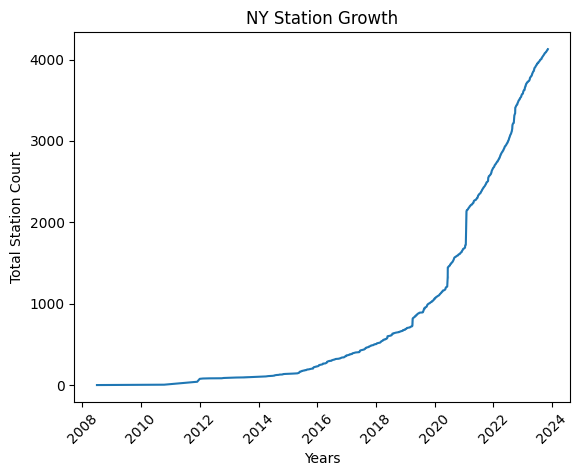

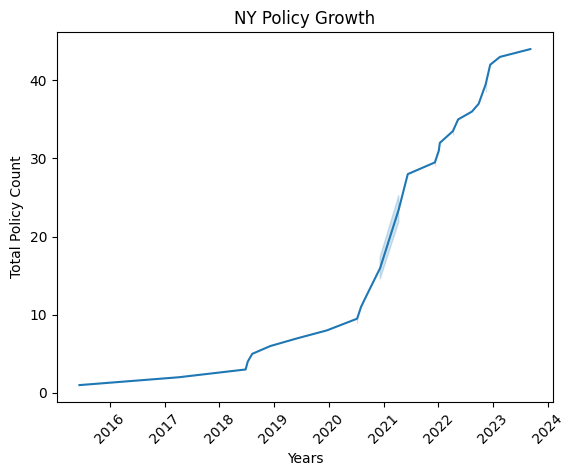

2015-06-12 00:00:00
2023-09-07 00:00:00


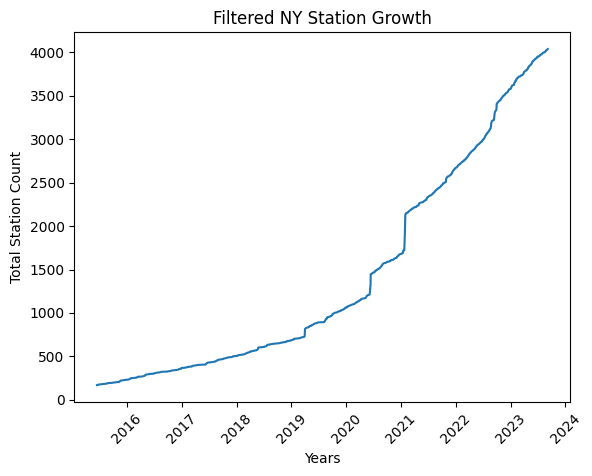

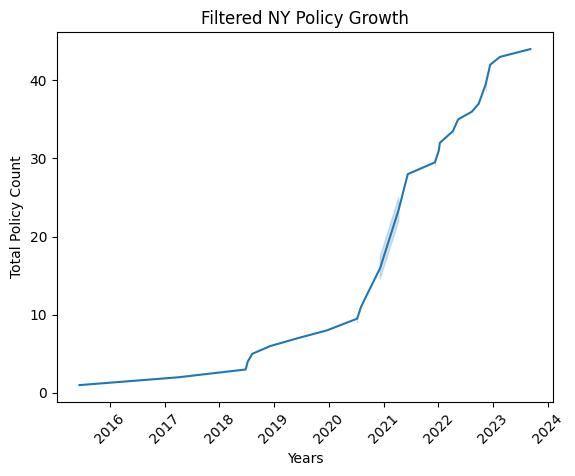

In [17]:
# Simple initial test
def time_to_ts(date_obj):
	return date_obj.replace(tzinfo=timezone.utc).timestamp()

def diy_index(df):
	return list(range(1, df.shape[0] + 1))

def filter_entries_outside_date_range(df, start, end):
	mask = 1
	mask &= df[parsed_date_col] >= start
	mask &= df[parsed_date_col] <= end
	return df[mask]

charging_station_data['open_timestamp'] = charging_station_data[parsed_date_col].apply(time_to_ts)
# charging_station_data.head()
state = 'NY'
stations = filter_by_state(charging_station_data, state)[[parsed_date_col]].sort_values(by=parsed_date_col).reset_index()
stations['station_counts'] = diy_index(stations)

make_lineplot(
	stations,
	parsed_date_col,
	'station_counts',
	'Years',
	'Total Station Count',
	'NY Station Growth'
)
policies = filter_by_state(policy_data, state)[[parsed_date_col]].sort_values(by=parsed_date_col).reset_index()
policies['policy_counts'] = diy_index(policies)
make_lineplot(
	policies,
	parsed_date_col,
	'policy_counts',
	'Years',
	'Total Policy Count',
	'NY Policy Growth'
)

highest_start_date = max(stations[parsed_date_col][0], policies[parsed_date_col][0])
print(highest_start_date)
lowest_end_date = min(stations[parsed_date_col][stations.shape[0]-1], policies[parsed_date_col][policies.shape[0]-1])
print(lowest_end_date)

stations = filter_entries_outside_date_range(stations, highest_start_date, lowest_end_date)
policies = filter_entries_outside_date_range(policies, highest_start_date, lowest_end_date)


make_lineplot(
	stations,
	parsed_date_col,
	'station_counts',
	'Years',
	'Total Station Count',
	'Filtered NY Station Growth'
)

make_lineplot(
	policies,
	parsed_date_col,
	'policy_counts',
	'Years',
	'Total Policy Count',
	'Filtered NY Policy Growth'
)

# merged_data['pct_diff_station_counts'] = merged_data['station_counts'].pct_change()
# merged_data['pct_diff_policy_counts'] = merged_data['policy_counts'].pct_change()
# merged_data = merged_data.dropna()
# merged_data.head()

#merged_data = merged_data[['station_counts', 'policy_counts']].pct_change().dropna()

# make_lineplot(
# 	merged_data,
# 	parsed_date_col,
# 	'pct_diff_station_counts',
# 	'Years',
# 	'% Change in Station Count',
# 	'NY Station Growth Rate'
# )

# make_lineplot(
# 	merged_data,
# 	parsed_date_col,
# 	'pct_diff_policy_counts',
# 	'Years',
# 	'% Change in Policy Count',
# 	'NY Policy Growth Rate'
# )

In [18]:
merged_data = pd.merge_asof(stations, policies, on=parsed_date_col)

In [19]:
merged_data.head(900)

,index_x,parsed_date,station_counts,index_y,policy_counts
0,307,2015-06-15,169,2,1
1,372,2015-06-22,170,2,1
2,334,2015-06-22,171,2,1
3,401,2015-06-22,172,2,1
4,174,2015-06-23,173,2,1
...,...,...,...,...,...
895,953,2020-01-07,1064,0,8
896,954,2020-01-07,1065,0,8
897,956,2020-01-08,1066,0,8
898,957,2020-01-08,1067,0,8


In [20]:
merged_data['station_counts_diff'] = merged_data['station_counts'].diff()

In [21]:
merged_data.head(900)

,index_x,parsed_date,station_counts,index_y,policy_counts,station_counts_diff
0,307,2015-06-15,169,2,1,NaN
1,372,2015-06-22,170,2,1,1.0
2,334,2015-06-22,171,2,1,1.0
3,401,2015-06-22,172,2,1,1.0
4,174,2015-06-23,173,2,1,1.0
...,...,...,...,...,...,...
895,953,2020-01-07,1064,0,8,1.0
896,954,2020-01-07,1065,0,8,1.0
897,956,2020-01-08,1066,0,8,1.0
898,957,2020-01-08,1067,0,8,1.0


In [22]:
merged_data['station_counts_diff'].value_counts()

1.0    3869
Name: station_counts_diff, dtype: int64

In [23]:
merged_data['policy_counts_diff'] = merged_data['policy_counts'].diff()

In [24]:
merged_data.head(900)

,index_x,parsed_date,station_counts,index_y,policy_counts,station_counts_diff,policy_counts_diff
0,307,2015-06-15,169,2,1,NaN,NaN
1,372,2015-06-22,170,2,1,1.0,0.0
2,334,2015-06-22,171,2,1,1.0,0.0
3,401,2015-06-22,172,2,1,1.0,0.0
4,174,2015-06-23,173,2,1,1.0,0.0
...,...,...,...,...,...,...,...
895,953,2020-01-07,1064,0,8,1.0,0.0
896,954,2020-01-07,1065,0,8,1.0,0.0
897,956,2020-01-08,1066,0,8,1.0,0.0
898,957,2020-01-08,1067,0,8,1.0,0.0


In [25]:
merged_data['policy_counts_diff'].value_counts()

0.0    3845
1.0      18
2.0       3
7.0       1
8.0       1
4.0       1
Name: policy_counts_diff, dtype: int64

# VAR and Granger Causality

### Granger Causality

In [26]:
merged_data.head(3)

,index_x,parsed_date,station_counts,index_y,policy_counts,station_counts_diff,policy_counts_diff
0,307,2015-06-15,169,2,1,NaN,NaN
1,372,2015-06-22,170,2,1,1.0,0.0
2,334,2015-06-22,171,2,1,1.0,0.0


In [27]:
merged_df = merged_data[['parsed_date', 'station_counts', 'policy_counts']]

In [28]:
merged_df = merged_df.set_index('parsed_date')

In [29]:
merged_df.head(3)

,station_counts,policy_counts
parsed_date,,
2015-06-15,169,1
2015-06-22,170,1
2015-06-22,171,1


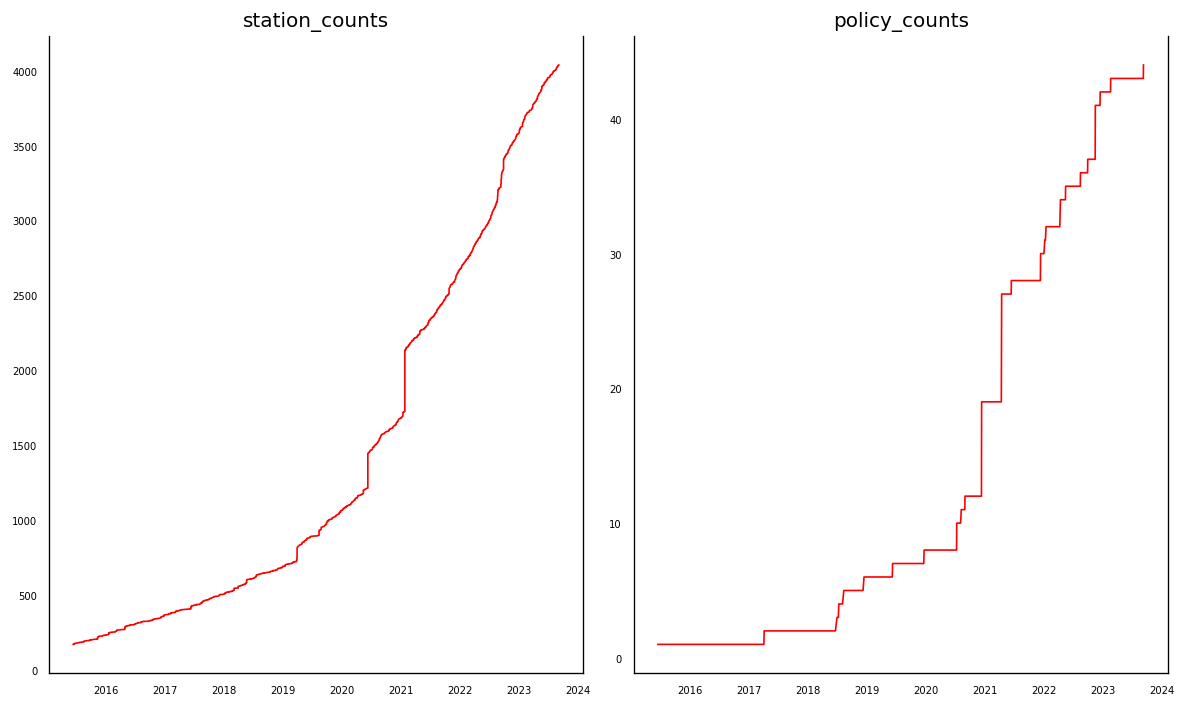

In [30]:
# Plot
fig, axes = plt.subplots(nrows=1, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = merged_df[merged_df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(merged_df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [31]:
merged_df.head(3)

,station_counts,policy_counts
parsed_date,,
2015-06-15,169,1
2015-06-22,170,1
2015-06-22,171,1


In [32]:
merged_data_pct = merged_df[['station_counts', 'policy_counts']].pct_change().dropna()

In [33]:
merged_df['policy_counts'].value_counts()

19    570
8     422
43    336
28    323
36    231
1     227
2     211
6     202
35    196
7     168
37    166
32    164
42    162
12    101
27     78
34     61
30     52
11     42
5      42
41     41
10     38
4      22
31      8
3       6
44      1
Name: policy_counts, dtype: int64

In [34]:
merged_df

,station_counts,policy_counts
parsed_date,,
2015-06-15,169,1
2015-06-22,170,1
2015-06-22,171,1
2015-06-22,172,1
2015-06-23,173,1
...,...,...
2023-09-02,4034,43
2023-09-05,4035,43
2023-09-06,4036,43


In [35]:
merged_data_pct

,station_counts,policy_counts
parsed_date,,
2015-06-22,0.005917,0.000000
2015-06-22,0.005882,0.000000
2015-06-22,0.005848,0.000000
2015-06-23,0.005814,0.000000
2015-06-24,0.005780,0.000000
...,...,...
2023-09-02,0.000248,0.000000
2023-09-05,0.000248,0.000000
2023-09-06,0.000248,0.000000


In [36]:
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=3
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table
    are the P-Values. P-Values lesser than the significance level (0.05), implies
    the Null Hypothesis that the coefficients of the corresponding past values is
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(merged_data_pct, variables = merged_data_pct.columns)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


,station_counts_x,policy_counts_x
station_counts_y,0.9981,0.0078
policy_counts_y,0.0065,1.0000


### Cointegration Test

In [37]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05):
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(merged_data_pct)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
station_counts ::  536.26    > 12.3212   =>   True
policy_counts ::  0.0       > 4.1296    =>   False


### VAR Model

In [38]:
merged_data_pct.head(4)

,station_counts,policy_counts
parsed_date,,
2015-06-22,0.005917,0.0
2015-06-22,0.005882,0.0
2015-06-22,0.005848,0.0
2015-06-23,0.005814,0.0


In [39]:
nobs = int(0.2*len(merged_data_pct))
df_train, df_test = merged_data_pct[0:-nobs], merged_data_pct[-nobs:]

# Check size
print(df_train.shape)
print(df_test.shape)

(3096, 2)
(773, 2)


In [40]:
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

# check that time series data is stationary (mean and variance do not change over time)
# to do this, we are using Augmented Dicker-Fuller Test (ADF Test)
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue']
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [41]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

<ipython-input-41-6190c5bd6949>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in df_train.iteritems():


    Augmented Dickey-Fuller Test on "station_counts" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -87.1765
 No. Lags Chosen       = 7
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "policy_counts" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -21.1625
 No. Lags Chosen       = 5
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




### Select Order (P) of VAR model

In [42]:
# we must pick the order that gives a model with least AIC.

model = VAR(df_train)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -34.21943964779387
BIC :  -34.207735202200745
FPE :  1.3762146848821863e-15
HQIC:  -34.21523626118642 

Lag Order = 2
AIC :  -45.96443516124213
BIC :  -45.94492249145825
FPE :  1.0911876653182784e-20
HQIC:  -45.957427512527666 

Lag Order = 3
AIC :  -56.937096111674926
BIC :  -56.90977100504137
FPE :  1.872980905181064e-25
HQIC:  -56.92728259567627 

Lag Order = 4
AIC :  -67.35489885460211
BIC :  -67.31975709477847
FPE :  5.599369309531247e-30
HQIC:  -67.34227786469823 

Lag Order = 5
AIC :  -76.06163012058444
BIC :  -76.01866748754435
FPE :  9.265178274848925e-34
HQIC:  -76.04620004870867 

Lag Order = 6
AIC :  -75.96488198952261
BIC :  -75.9140942595494
FPE :  1.020636220635935e-33
HQIC:  -75.94664122616089 

Lag Order = 7
AIC :  -75.09570130179759
BIC :  -75.03708424747983
FPE :  2.434172637850887e-33
HQIC:  -75.07464823598671 

Lag Order = 8
AIC :  -74.19037334494996
BIC :  -74.12392273517699
FPE :  6.019083145552533e-33
HQIC:  -74.16650636427579 

Lag Order = 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


</b> Train VAR model of selected order P

In [43]:
# we will take Lago Order = 5 since it has lowest AIC
model_fitted = model.fit(5)
model_fitted.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/vector_ar/var_model.py:1559: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 19, Nov, 2023
Time:                     20:15:45
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -76.0187
Nobs:                     3091.00    HQIC:                  -76.0462
Log likelihood:           108803.    FPE:                9.26518e-34
AIC:                     -76.0616    Det(Omega_mle):     9.19958e-34
--------------------------------------------------------------------
Results for equation station_counts
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     0.000000         0.000000          102.437           0.000
L1.station_counts         4.917689              NAN              NAN             NAN
L1.policy_counts         -0.000000 

In [44]:
def adjust(val, length= 6): return str(val).ljust(length)

In [45]:
# Check for serial Correlation of Residuals (Errors) using Durbin Watson Statistic
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(merged_data_pct.columns, out):
  print(adjust(col), ':', round(val, 2))

station_counts : 2.64
policy_counts : 2.0


In [46]:
# Serial correlations look good so can move onto the forecast

### Forecast VAR model

In [47]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

5


In [48]:
# Input data for forecasting
forecast_input = df_train.values[-lag_order:]
forecast_input

array([[0.00030675, 0.        ],
       [0.00030665, 0.        ],
       [0.00030656, 0.        ],
       [0.00030647, 0.        ],
       [0.00030637, 0.        ]])

In [49]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=merged_data_pct.index[-nobs:], columns=merged_data_pct.columns + '_2d')
df_forecast

,station_counts_2d,policy_counts_2d
parsed_date,,
2022-09-15,0.000306,0.000879
2022-09-15,0.000306,0.000872
2022-09-15,0.000306,0.000866
2022-09-15,0.000306,0.000860
2022-09-15,0.000306,0.000853
...,...,...
2023-09-02,0.000254,0.000732
2023-09-05,0.000254,0.000732
2023-09-06,0.000254,0.000732


In [50]:
df_forecast = df_forecast.rename(columns={"station_counts_2d": "station_counts_forecast", "policy_counts_2d": "policy_counts_forecast"})

In [51]:
df_test.head(10)

,station_counts,policy_counts
parsed_date,,
2022-09-15,0.000306,0.0
2022-09-15,0.000306,0.0
2022-09-15,0.000306,0.0
2022-09-15,0.000306,0.0
2022-09-15,0.000306,0.0
2022-09-15,0.000306,0.0
2022-09-15,0.000306,0.0
2022-09-15,0.000306,0.0
2022-09-15,0.000306,0.0


In [52]:
df_forecast.head(10)

,station_counts_forecast,policy_counts_forecast
parsed_date,,
2022-09-15,0.000306,0.000879
2022-09-15,0.000306,0.000872
2022-09-15,0.000306,0.000866
2022-09-15,0.000306,0.000860
2022-09-15,0.000306,0.000853
2022-09-15,0.000306,0.000847
2022-09-15,0.000306,0.000846
2022-09-15,0.000306,0.000845
2022-09-15,0.000306,0.000844


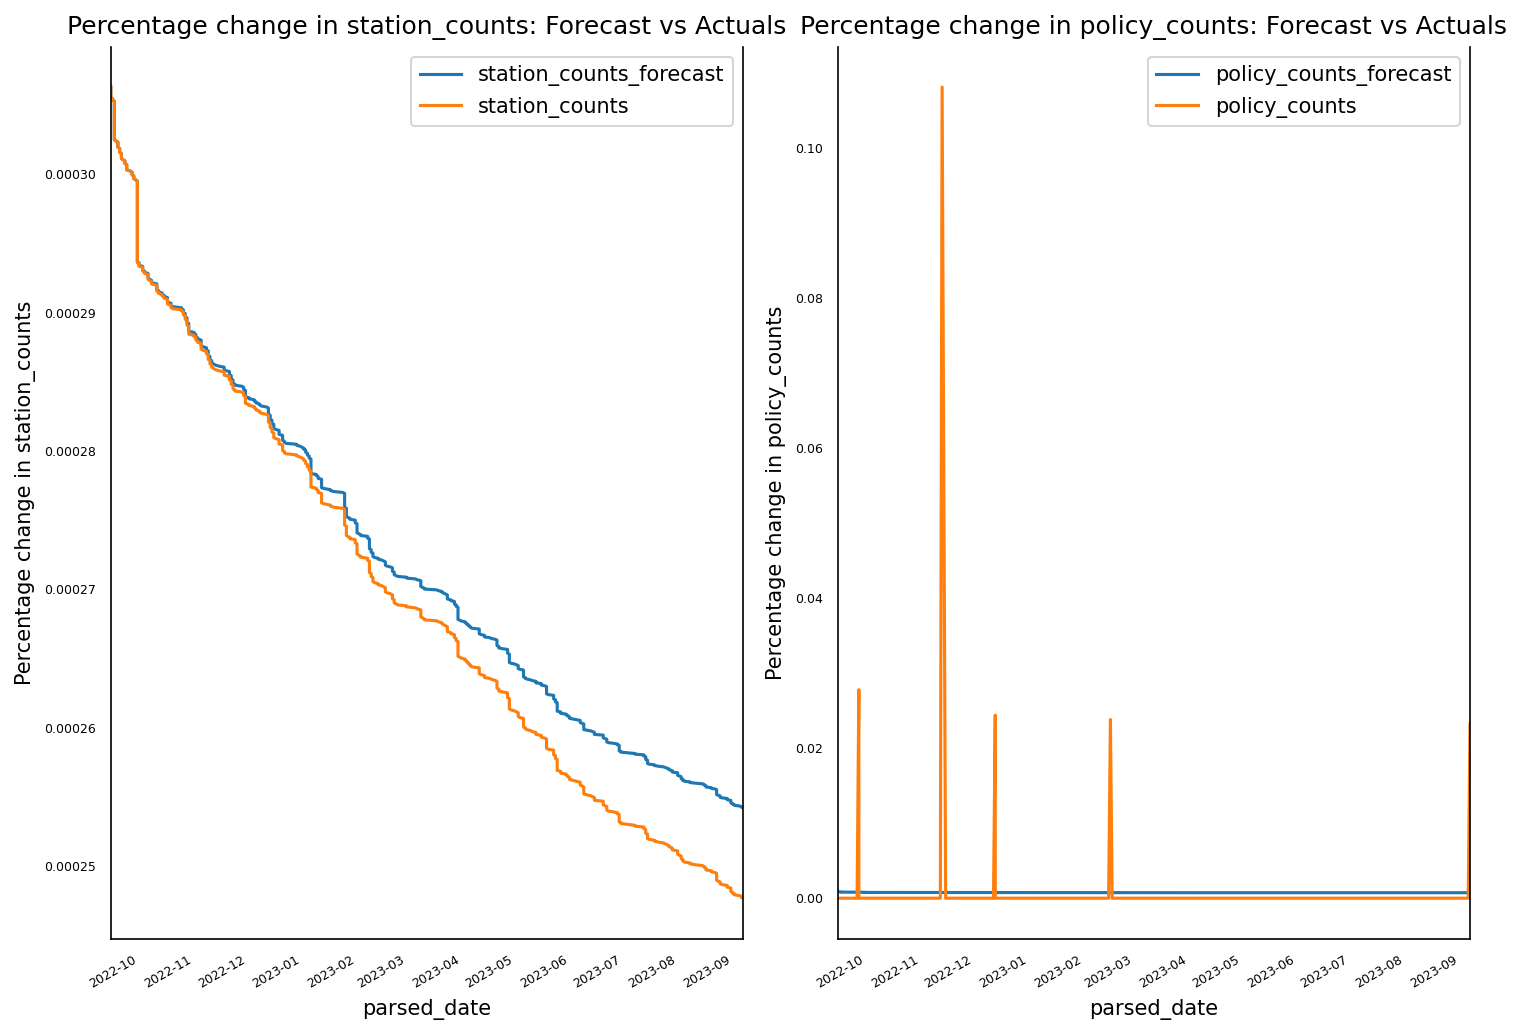

In [53]:
fig, axes = plt.subplots(nrows=int(len(merged_data_pct.columns)/2), ncols=2, dpi=150, figsize=(10,7))
for i, (col,ax) in enumerate(zip(merged_data_pct.columns, axes.flatten())):
    df_forecast[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title("Percentage change in " + col + ": Forecast vs Actuals")
    ax.set_ylabel("Percentage change in " + col)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

</b> The basis behind Vector AutoRegression is that each of the time series in the system influences each other. That is, you can predict the series with past values of itself along with other series in the system.

</b> So as can be seen above, we can forecast/predict the percentage change in station counts over time based on past values of itself and the policy time series values.

Another test we should do: can we forecast/predict the car registration based on past values of itself and the policy time series values as well as the station time series values.

### Evaluate forecasts

</b>The left graph for percentage change station_counts_forecast is a good estimate for actual percentage change station_counts. The right graph for percentage change policy_counts has small blips every so often - this is because the percentage change in policy counts is 0.0 for a lot of the rows and then it will increase by one policy so it will become non-zero at those time points.  

In [54]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: station_counts')
accuracy_prod = forecast_accuracy(df_forecast['station_counts_forecast'].values, df_test['station_counts'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: policy_counts')
accuracy_prod = forecast_accuracy(df_forecast['policy_counts_forecast'].values, df_test['policy_counts'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: station_counts
mape   :  0.0079
me     :  0.0
mae    :  0.0
mpe    :  0.0079
rmse   :  0.0
corr   :  0.999
minmax :  0.0077

Forecast Accuracy of: policy_counts
mape   :  inf
me     :  0.0005
mae    :  0.001
mpe    :  inf
rmse   :  0.0043
corr   :  0.0048
minmax :  0.9998


<ipython-input-54-61e95bbfdc09>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-54-61e95bbfdc09>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)


</b> Low MAPE (Mean Absolute Percentage Error) - we can conclude the forecast accuracy of station_counts is good. High correlation - also good.

In [55]:
merged_data_updated = pd.merge_asof(stations, policies, on=parsed_date_col)
# merged_data['pct_diff_station_counts'] = merged_data['station_counts'].pct_change()
# merged_data['pct_diff_policy_counts'] = merged_data['policy_counts'].pct_change()
# merged_data = merged_data.dropna()
# merged_data.head()

merged_data_pct = merged_data_updated[['station_counts', 'policy_counts']].pct_change().dropna()
#merged_data = merged_data[['station_counts', 'policy_counts']].diff().dropna()